In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
from tqdm import tqdm 
tqdm.pandas()
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_fips = pd.read_csv('../data/census_counts.csv')
df_all = pd.read_csv('../data/all_depts.csv')
df_richmond = pd.read_csv('../data/richmond_apparatus_data.csv')

In [14]:
df_1 = df_fips[['department_name','incident_count']].groupby('department_name').sum('incident_count').reset_index()

In [15]:
df_2 = df_all[['department_name','count']].groupby('department_name').sum('count').reset_index()

In [20]:
df_all = pd.merge(df_1, df_2, on='department_name', how='inner')

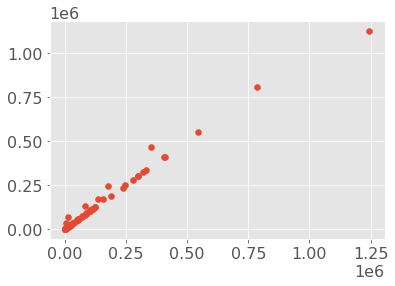

In [23]:
plt.scatter(df_all['incident_count'], df_all['count'])

In [71]:
df_richmond.dropna(subset=['address.location.social_vulnerability_2016.general.fips'])['address.location.social_vulnerability_2016.general.fips'].apply(lambda x: str(x)[0:5]).astype(int).value_counts()[0:10]





51760    61468
51041      143
51087      103
Name: address.location.social_vulnerability_2016.general.fips, dtype: int64

In [76]:
df_fips['address.location.social_vulnerability_2016.general.fips'] = df_fips['address.location.social_vulnerability_2016.general.fips'].apply(lambda x: str(x)[0:5]).astype(int)

In [79]:
df_fips[df_fips['department_name'] == 'Richmond Fire and Emergency Services (93345)'].sort_values('incident_count', ascending=False)['address.location.social_vulnerability_2016.general.fips'].to_frame()



,address.location.social_vulnerability_2016.general.fips
9894,51760
9895,51760
9896,51760
9897,51760
9898,51760
...,...
10001,51087
10002,51087
10003,51087
10004,51101


In [46]:
[col for col in df_fips.columns if 'Richmond' in col]

[]

In [39]:
('Richmond').isin(df_fips['department_name'])

AttributeError: 'str' object has no attribute 'isin'

In [40]:
'Richmond' in df_fips['department_name']

False

In [42]:
[i for i in df_fips['department_name'] if 'Richmond' in i]

['Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and Emergency Services (93345)',
 'Richmond Fire and 